## Load The Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics) 

In [151]:
#Read the file ,add header 
#Reading only 1048576 reocrds instead of 70Lac records because of memory issue
df_eletronics_rating=pd.read_csv('ratings_Electronics.csv',header=None,names='User_ID Product_ID Ratings TimeStamp'.split())

In [152]:
df_eletronics_rating.shape

(1048576, 4)

In [153]:
df_eletronics_rating.head()

,User_ID,Product_ID,Ratings,TimeStamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [154]:
#Drop TimeStamp
df_eletronics_rating.drop('TimeStamp',axis=1,inplace=True)

In [155]:
df_eletronics_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
User_ID       1048576 non-null object
Product_ID    1048576 non-null object
Ratings       1048576 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [156]:
#No missing values
df_eletronics_rating.isnull().sum()

User_ID       0
Product_ID    0
Ratings       0
dtype: int64

## 2. Take a subset of the dataset to make it less sparse/ denser.
( For example, keep the users only who has given 50 or more number of ratings ) 

In [157]:
a=df_eletronics_rating['User_ID'].value_counts().reset_index(name="count").query("count > 50")["index"]

In [158]:
a=list(a)

In [159]:
df_eletronics_rating.drop(df_eletronics_rating[df_eletronics_rating['User_ID'].apply(lambda x: x not in a)].index,axis=0,inplace=True)

In [161]:
df_eletronics_rating.shape

(3406, 3)

In [168]:
#converting to category datatype

In [165]:
df_eletronics_rating['User_ID']=df_eletronics_rating['User_ID'].astype('category')

In [166]:
df_eletronics_rating['Product_ID']=df_eletronics_rating['Product_ID'].astype('category')

In [167]:
df_eletronics_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3406 entries, 2162 to 1048158
Data columns (total 3 columns):
User_ID       3406 non-null category
Product_ID    3406 non-null category
Ratings       3406 non-null int64
dtypes: category(2), int64(1)
memory usage: 167.4 KB


## Data Visualization

In [170]:
#Encoding the User_id and Product Id columns for better representation in plotting graph
df_eletronics_rating['User_ID_encoded']=pd.Categorical(df_eletronics_rating['User_ID']).codes
df_eletronics_rating['Product_ID_encoded']=pd.Categorical(df_eletronics_rating['Product_ID']).codes

In [78]:
df_eletronics_rating.head(10)

,User_ID,Product_ID,Ratings,User_ID_encoded,Product_ID_encoded
2162,A5JLAU2ARJ0BO,1400532655,1,25,0
3050,ALUNVOQRXOZIA,1400599997,1,33,1
4614,A1VQHH85U7PX0,9043413585,3,11,2
7381,A2AEZQ3DGBBLPR,B000000O48,5,15,3
7448,A2R6RA8FRBS608,B000001OL6,4,20,4
7748,A680RUE1FDO8B,B000001OMI,5,26,5
7789,A11D1KHM7DVOQK,B000001OMN,2,0,6
8350,A3NCIN6TNL0MGA,B00000DM9W,5,23,7
8732,A6FIAB28IS79,B00000J05A,3,27,8
8979,A1RPTVW5VEOSI,B00000J061,5,10,9


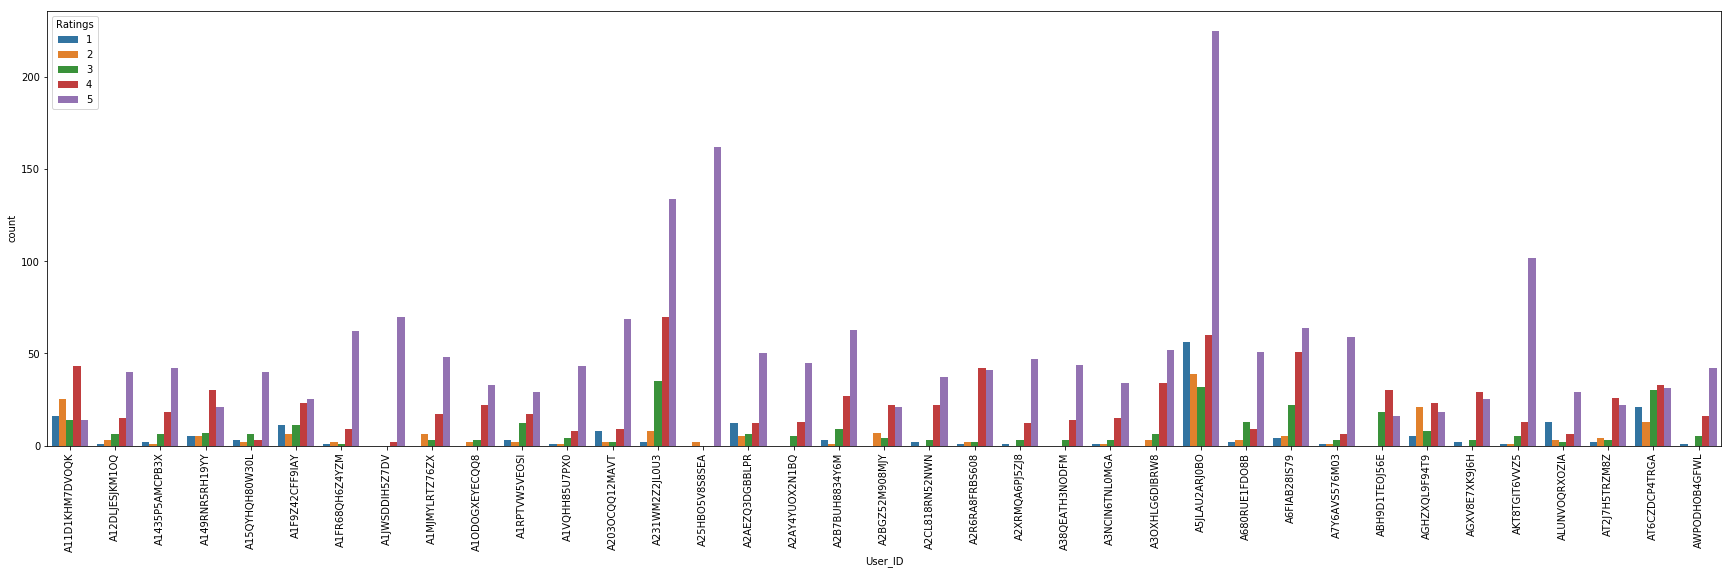

In [91]:
from matplotlib import pyplot as plt
a4_dims = (30, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
sns.countplot(ax=ax,x='User_ID',hue='Ratings',data=df_eletronics_rating)

As seen from the graph user A25HB05V2585E has given the highest 5 ratings .Hence proving biased ratings

(array([ 181.,    0.,  176.,    0.,    0.,  298.,    0.,  801.,    0.,
        1950.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

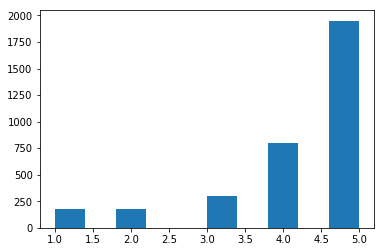

In [212]:
plt.hist(df_eletronics_rating['Ratings'])

Most of user have given 5 ratings 

## 3.Popularity Based Recommended Systems

In [172]:
df_eletronics_rating.groupby('Product_ID')['Ratings'].count().sort_values(ascending=False).head() 

Product_ID
B00004SB92    7
B00004ZCJE    5
B00007KDVI    5
B000BKJZ9Q    5
B00008OE6I    5
Name: Ratings, dtype: int64

In [173]:
ratings_mean_count = pd.DataFrame(df_eletronics_rating.groupby('Product_ID')['Ratings'].mean()) 

In [174]:
ratings_mean_count.head(10)

,Ratings
Product_ID,
1400532655,1.0
1400599997,1.0
9043413585,3.0
B000000O48,5.0
B000001OL6,4.0
B000001OMI,5.0
B000001OMN,2.0
B00000DM9W,5.0
B00000J05A,3.0


In [175]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_eletronics_rating.groupby('Product_ID')['Product_ID'].count())  

In [219]:
ratings_mean_count.sort_values(by=['Ratings','rating_counts'],ascending=False).head(5)

,Ratings,rating_counts
Product_ID,,
B0007QKMQY,5.0,4
B000BY52NK,5.0,4
B00004Z5M1,5.0,3
B000050AQ7,5.0,3
B00005LENO,5.0,3


### Convert the dataframe to surprise object

In [177]:
from surprise import SVD
from surprise import dataset
from surprise import Reader
from collections import defaultdict
# You'll need to create a dummy reader
reader = Reader(line_format='user item rating', rating_scale=(1, 5))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df_eletronics_rating['User_ID'], df_eletronics_rating['Product_ID'], df_eletronics_rating['Ratings'])]
        self.reader=reader

data = MyDataset(df_eletronics_rating, reader)

 ## 4. Split the data randomly into train and test dataset. 
 ( For example, split it in 70/30 ratio) 

In [178]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [179]:
trainset, testset = train_test_split(data,test_size=.30)

## 5. Build Collaborative Filtering model. 

## a. User-User collaborative Filtering Model

In [180]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [181]:
trainset.ur

defaultdict(list,
            {0: [(0, 5),
              (21, 3),
              (99, 5),
              (108, 3),
              (111, 5),
              (112, 5),
              (121, 4),
              (132, 5),
              (143, 5),
              (160, 4),
              (166, 5),
              (191, 5),
              (206, 4),
              (216, 5),
              (232, 5),
              (236, 4),
              (265, 3),
              (267, 3),
              (269, 5),
              (272, 2),
              (279, 5),
              (306, 5),
              (319, 4),
              (345, 2),
              (374, 5),
              (381, 4),
              (403, 5),
              (406, 3),
              (414, 5),
              (432, 2),
              (443, 5),
              (480, 5),
              (493, 4),
              (507, 3),
              (511, 5),
              (512, 5),
              (516, 3),
              (532, 4),
              (533, 4),
              (560, 4),
              (571, 3),

In [102]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [182]:
test_pred

[Prediction(uid='ABH9D1TEOJ56E', iid='B0002YE686', r_ui=4.220218120805369, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B00021Z98A', r_ui=4.220218120805369, est=3.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B000FNBYKW', r_ui=4.220218120805369, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B0000630TO', r_ui=4.220218120805369, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B00022TNF4', r_ui=4.220218120805369, est=1, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B000ANRP82', r_ui=4.220218120805369, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B00006IUSY', r_ui=4.220218120805369, est=3.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B000DZFTZS', r_ui=4.2

## 6. Evaluate the above model. 
( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) 
You can also use a different method to evaluate the models. 

In [183]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.1231


1.1231210349242995

## 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. 

In [184]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n=defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[str(uid)].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [185]:
user_results=get_top_n(test_pred, n=5)

In [205]:
print('A231WM2Z2JL0U3  :',user_results['A231WM2Z2JL0U3'])
print('A6FIAB28IS79 :',user_results['A6FIAB28IS79'])
print('A11D1KHM7DVOQK :',user_results['A11D1KHM7DVOQK'])

A231WM2Z2JL0U3  : [('B000DZFTZS', 5), ('B000GF4DZ2', 5), ('B00064V6SK', 5), ('B0002LEN32', 5), ('B00006JU62', 5)]
A6FIAB28IS79 : [('B0000630TO', 5), ('B000DZFTZS', 5), ('B000GF4DZ2', 5), ('B00064V6SK', 5), ('B0002LEN32', 5)]
A11D1KHM7DVOQK : [('B0000630TO', 5), ('B000DZFTZS', 5), ('B000GF4DZ2', 5), ('B00064V6SK', 5), ('B0002LEN32', 5)]


## 5b. Item-Item collaborative Filtering Model

In [187]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [188]:
trainset.ur

defaultdict(list,
            {0: [(0, 5),
              (21, 3),
              (99, 5),
              (108, 3),
              (111, 5),
              (112, 5),
              (121, 4),
              (132, 5),
              (143, 5),
              (160, 4),
              (166, 5),
              (191, 5),
              (206, 4),
              (216, 5),
              (232, 5),
              (236, 4),
              (265, 3),
              (267, 3),
              (269, 5),
              (272, 2),
              (279, 5),
              (306, 5),
              (319, 4),
              (345, 2),
              (374, 5),
              (381, 4),
              (403, 5),
              (406, 3),
              (414, 5),
              (432, 2),
              (443, 5),
              (480, 5),
              (493, 4),
              (507, 3),
              (511, 5),
              (512, 5),
              (516, 3),
              (532, 4),
              (533, 4),
              (560, 4),
              (571, 3),

In [189]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [190]:
test_pred

[Prediction(uid='A1RPTVW5VEOSI', iid='B00009UT3F', r_ui=4, est=3.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2B7BUH8834Y6M', iid='B0006SQWR6', r_ui=5, est=4.2365771812080535, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A6FIAB28IS79', iid='B00065XSP8', r_ui=4, est=4.2365771812080535, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B0002XZQ9U', r_ui=1, est=4.2365771812080535, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AKT8TGIT6VVZ5', iid='B00005LE72', r_ui=4, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00005KB24', r_ui=5, est=4.2365771812080535, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A680RUE1FDO8B', iid='B00022VBAE', r_ui=4, est=2.0, details={'actual_k': 0, 'was_impossible': False}),
 Predi

## 6b. Evaluate the above model.

In [191]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.2208


1.2207721117386723

## 7b. Get top - K ( K = 5) recommendations.  

In [192]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n=defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[str(uid)].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [193]:
item_results=get_top_n(test_pred, n=5)

In [206]:
print('A231WM2Z2JL0U3  :',item_results['A231WM2Z2JL0U3'])
print('A6FIAB28IS79 :',item_results['A6FIAB28IS79'])
print('A11D1KHM7DVOQK :',item_results['A11D1KHM7DVOQK'])

A231WM2Z2JL0U3  : [('B000050NON', 5), ('B0000658CG', 5), ('B000050AQ7', 5), ('B00005A0R4', 5), ('B0000645C9', 5)]
A6FIAB28IS79 : [('B0001DBEM4', 5), ('B00007JDR0', 5), ('B000065BPC', 5), ('B000075UZ7', 5), ('B00006IAAN', 5)]
A11D1KHM7DVOQK : [('B0000E1717', 5), ('B000FONSEQ', 5), ('B00008VF63', 4.5), ('B00005T39Y', 4.2365771812080535), ('B000BC8VV2', 4.2365771812080535)]


## SVD METHOD FOR RECOMMENDATION

In [195]:
algo = SVD()
algo.fit(trainset)

In [196]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [197]:
testset

[('A231WM2Z2JL0U3', 'B00006I5VX', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B0007ZAK4O', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B0000CEJUO', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B0000TU7I6', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B00004U1TJ', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B000230L3G', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B00009R8I4', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B0000AGAWV', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B000069E1H', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B000AV14M2', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B000BQ57BU', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B00004SP9T', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B00006HO3O', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B00004Y7TC', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B000EOWRJ4', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B0009AI5XA', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B000BKH1ME', 4.2365771812080535),
 ('A231WM2Z2JL0U3', 'B0007XO79A', 4.2365771812080535),
 ('A231WM2

In [198]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [199]:
test_pred

[Prediction(uid='A231WM2Z2JL0U3', iid='B00006I5VX', r_ui=4.2365771812080535, est=4.159667856752364, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B0007ZAK4O', r_ui=4.2365771812080535, est=4.361104262606965, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B0000CEJUO', r_ui=4.2365771812080535, est=4.500944872305799, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B0000TU7I6', r_ui=4.2365771812080535, est=4.311548160284331, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00004U1TJ', r_ui=4.2365771812080535, est=4.019634851303257, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B000230L3G', r_ui=4.2365771812080535, est=4.361313175481299, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B00009R8I4', r_ui=4.2365771812080535, est=4.297782963906709, details={'was_impossible': False}),
 Prediction(uid='A231WM2Z2JL0U3', iid='B0000AGAW

## 6c.Evalutaion of the model

In [200]:
# get RMSE
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD : Test Set
RMSE: 0.4649


0.4649285067233495

## 7c. Get top - K ( K = 5) recommendations. 

In [201]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [202]:
top_n = get_top_n(test_pred, n=5)

In [203]:
top_n

defaultdict(list,
            {'A231WM2Z2JL0U3': [('B0000BZG0P', 4.925596718616365),
              ('B00004RG7N', 4.817612666578592),
              ('B00021O4UO', 4.811081976908939),
              ('B0006B486K', 4.786837524711741),
              ('B000068IGG', 4.784127854075112)],
             'A6FIAB28IS79': [('B00006JN3G', 4.716659251599775),
              ('B0001M47FG', 4.649939407050613),
              ('B000FTLSR0', 4.633982818224616),
              ('B000063S4I', 4.63324661012739),
              ('B0000AQJ6U', 4.628362678946346)],
             'A11D1KHM7DVOQK': [('B000087BHV', 3.6866888109269422),
              ('B00015GYU4', 3.5460909728586523),
              ('B0001WV72W', 3.519412551914165),
              ('B0001GAMT2', 3.505471758151916),
              ('B00009LIG4', 3.4929066454896773)],
             'A5JLAU2ARJ0BO': [('B0001Q258I', 4.898702348048233),
              ('B0007A1IRC', 4.836770033883034),
              ('B00017G89E', 4.78053343551322),
              ('B00006IIU1'

In [204]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A231WM2Z2JL0U3 ['B0000BZG0P', 'B00004RG7N', 'B00021O4UO', 'B0006B486K', 'B000068IGG']
A6FIAB28IS79 ['B00006JN3G', 'B0001M47FG', 'B000FTLSR0', 'B000063S4I', 'B0000AQJ6U']
A11D1KHM7DVOQK ['B000087BHV', 'B00015GYU4', 'B0001WV72W', 'B0001GAMT2', 'B00009LIG4']
A5JLAU2ARJ0BO ['B0001Q258I', 'B0007A1IRC', 'B00017G89E', 'B00006IIU1', 'B00005AWBJ']
AKT8TGIT6VVZ5 ['B00004Y7TC', 'B00005LD4T', 'B00005T3SP', 'B00004YNWQ', 'B00006JU62']
A2BGZ52M908MJY ['B00092GM0Q', 'B00004U0CR', 'B000087LII', 'B0006B486K', 'B0000AGAWV']
A203OCQQ12MAVT ['B0000658CH', 'B00005NHHC', 'B00074Z9OQ', 'B000HKLIVI', 'B0001XE0QQ']
A680RUE1FDO8B ['B00004TX6M', 'B00005QFZF', 'B0007P4G58', 'B00006HXRA', 'B000HOJN3O']
AT6CZDCP4TRGA ['B00008OE46', 'B0001M47FG', 'B0000AAAYY', 'B0001MAB06', 'B0000659A8']
A1ODOGXEYECQQ8 ['B0001LD00A', 'B00008VFCS', 'B00009EFEK', 'B0000645C8', 'B000089GN3']
A1MJMYLRTZ76ZX ['B00007EDZG', 'B000F4C2AM', 'B00008OT2G', 'B0002Z4572', 'B00006JN3G']
A1435P5AMCPB3X ['B000CR78C4', 'B00005NFPU', 'B0000DB4D1', 'B

## 8. Summarise your insights.

#Comparing different models for user_id :- 'ABH9D1TEOJ56E','A1ODOGXEYECQQ8','A2AEZQ3DGBBLPR' 

### User-User Based RS

A231WM2Z2JL0U3  : ('B000DZFTZS', 5), ('B000GF4DZ2', 5), ('B00064V6SK', 5), ('B0002LEN32', 5), ('B00006JU62', 5)

A6FIAB28IS79    : ('B0000630TO', 5), ('B000DZFTZS', 5), ('B000GF4DZ2', 5), ('B00064V6SK', 5), ('B0002LEN32', 5)

A11D1KHM7DVOQK  : ('B0000630TO', 5), ('B000DZFTZS', 5), ('B000GF4DZ2', 5), ('B00064V6SK', 5), ('B0002LEN32', 5)
  
  
### Item-Item based RS

A231WM2Z2JL0U3  : ('B000050NON', 5), ('B0000658CG', 5), ('B000050AQ7', 5), ('B00005A0R4', 5), ('B0000645C9', 5)

A6FIAB28IS79    : ('B0001DBEM4', 5), ('B00007JDR0', 5), ('B000065BPC', 5), ('B000075UZ7', 5), ('B00006IAAN', 5)

A11D1KHM7DVOQK  : ('B0000E1717', 5), ('B000FONSEQ', 5), ('B00008VF63', 4.5), ('B00005T39Y', 4.23),('B000BC8VV2',4.23)]
  
  
### SVD based RS

 A231WM2Z2JL0U3 :-  'B0000BZG0P', 'B00004RG7N', 'B00021O4UO', 'B0006B486K', 'B000068IGG'
 
 A6FIAB28IS79   :- 'B00006JN3G', 'B0001M47FG', 'B000FTLSR0', 'B000063S4I', 'B0000AQJ6U'
 
 A11D1KHM7DVOQK :-  'B000087BHV', 'B00015GYU4', 'B0001WV72W', 'B0001GAMT2', 'B00009LIG4'

As seen the SVD based RS  gives the results with the least RMSE score as compared to Item-Item and User-User and with was_impossible as False for most of the records.

But for the Item_item and User-User collabarative the was_prediction as been set to True ,indicating the algo wasnt successful in getting the K neighbours.

This also indicates that from User-User and Item-Item the model is not able to learn may be due to lack of data as I have loaded 10% of the original data only.